In [64]:
import pandas as pd
from pathlib import Path
import os
from sklearn.pipeline import Pipeline
from openai import OpenAI
import dotenv
from ast import literal_eval
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [65]:
root = Path('.').resolve().parent
print(root)
file1 = "Embedding_test_meli.csv"
file2 = "Embedding_test_meli_2.csv"
pathfile = os.path.join(root,'src','data','processed',file1)
df1=pd.read_csv(pathfile)
pathfile = os.path.join(root,'src','data','processed',file2)
df2=pd.read_csv(pathfile)


D:\Clustering_MeLi


In [66]:
df1.head(5)

,Unnamed: 0,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp,mix,tokens,embedding
0,0,000631669c,1,10,799.0,newbie,Other,new,not refubirshed,OTHER,no,79.90,reputation: newbie; products: 1; stock: 10; pr...,51,"[-0.022159632295370102, -9.540207975078374e-05..."
1,1,0007153bca,2,55,798.0,green,Cross Docking,new,not refubirshed,OTHER,no,14.51,reputation: green; products: 2; stock: 55; pri...,53,"[-0.008028482086956501, -0.0006657879566773772..."
2,2,000bee3c3b,2,0,765.0,newbie,Cross Docking,new,not refubirshed,"BOOKS, MULTIMEDIA & OTHER E!",no,inf,reputation: newbie; products: 2; stock: 0; pri...,59,"[-0.01315187569707632, 0.009146839380264282, -..."
3,3,000df2bd02,1,5,1550.0,green,Cross Docking,used,not refubirshed,ACC CARS & VANS,no,310.00,reputation: green; products: 1; stock: 5; pric...,58,"[-0.012309647165238857, 0.0026134438812732697,..."
4,4,000e27cea2,2,6,915.0,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"HOUSEHOLD ITEMS,HEALTH",no,152.50,reputation: green_silver; products: 2; stock: ...,66,"[0.015350171364843845, -0.007768821436911821, ..."


In [67]:
df2.head(5)

,Unnamed: 0,seller_nickname,products,stock,price,seller_reputation,Lt,condition,isrefu,category_id,regular_price1,pxp,mix,tokens,totalcat,embedding
0,0,000631669c,1,10,799.0,newbie,Other,new,not refubirshed,OTHER,no,79.90,reputation: newbie; products: 1; stock: 10; pr...,53,1,"[-0.019504735246300697, -0.0005076241795904934..."
1,1,0007153bca,2,55,798.0,green,Cross Docking,new,not refubirshed,OTHER,no,14.51,reputation: green; products: 2; stock: 55; pri...,55,1,"[-0.002406255342066288, 0.0017549102194607258,..."
2,2,000bee3c3b,2,0,765.0,newbie,Cross Docking,new,not refubirshed,"BOOKS, MULTIMEDIA & OTHER E!",no,inf,reputation: newbie; products: 2; stock: 0; pri...,52,2,"[-0.01806306280195713, -0.001178268576040864, ..."
3,3,000df2bd02,1,5,1550.0,green,Cross Docking,used,not refubirshed,ACC CARS & VANS,no,310.00,reputation: green; products: 1; stock: 5; pric...,55,1,"[-0.009885057806968689, 0.010440726764500141, ..."
4,4,000e27cea2,2,6,915.0,green_silver,"FulfilledbyMerchant,Cross Docking",new,not refubirshed,"HOUSEHOLD ITEMS,HEALTH",no,152.50,reputation: green_silver; products: 2; stock: ...,62,2,"[0.002465498400852084, -0.009151219390332699, ..."


# Preparamos los datos


In [68]:
df1["embedding"] = df1.embedding.apply(literal_eval).apply(np.array)
df2["embedding"] = df2.embedding.apply(literal_eval).apply(np.array)
print("Df1:" ,df1["embedding"].shape)
print("Df2:" ,df2["embedding"].shape)

Df1: (2000,)
Df2: (2000,)


In [69]:
m1 = np.vstack(df1.embedding.values)
m2 = np.vstack(df2.embedding.values)
print("m1:" ,m1.shape)
print("m2:" ,m2.shape)

m1: (2000, 1536)
m2: (2000, 1536)


# Proceso Matrix 1

## Reducimos dimensionalidad

In [70]:
pca = PCA(n_components=10)
sklearn_transf = pca.fit_transform(m1)
varianza_expl = pca.explained_variance_ratio_
varianza_expl

array([0.14341169, 0.08936157, 0.0538223 , 0.04430245, 0.04137741,
       0.03769653, 0.03649056, 0.0314787 , 0.02773736, 0.0255836 ])

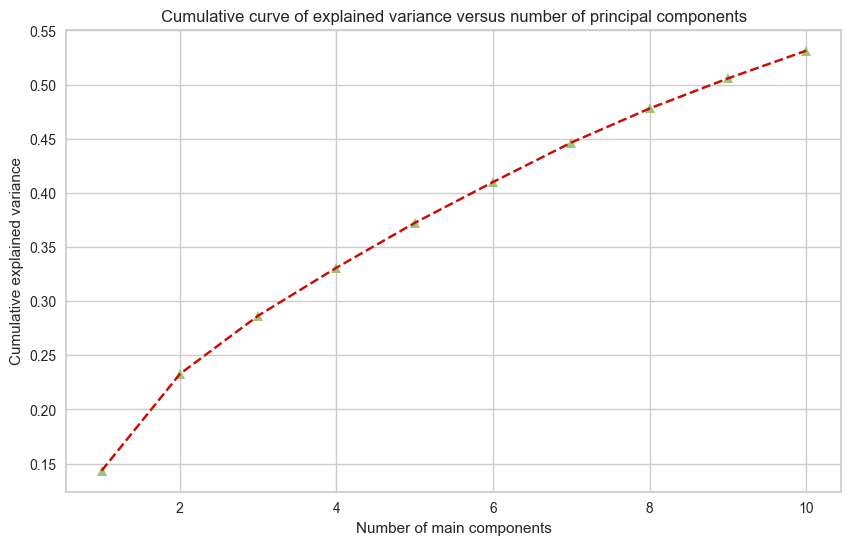

In [71]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

In [72]:
pca = PCA(n_components = 3)
pca.fit(m1)
PCA_DF=pd.DataFrame(pca.transform(m1), columns=['col0','col1', 'col2'])
PCA_DF.describe()

,col0,col1,col2
count,2.000000e+03,2.000000e+03,2.000000e+03
mean,-7.382983e-17,4.773959e-18,-8.482104e-17
std,1.612797e-01,1.273101e-01,9.880264e-02
min,-3.895203e-01,-2.276708e-01,-3.190421e-01
25%,-5.645083e-02,-1.161876e-01,-6.225969e-02
50%,4.180637e-02,-1.360614e-02,1.079301e-02
75%,1.141619e-01,1.008934e-01,6.795139e-02
max,2.396637e-01,2.925623e-01,2.341723e-01


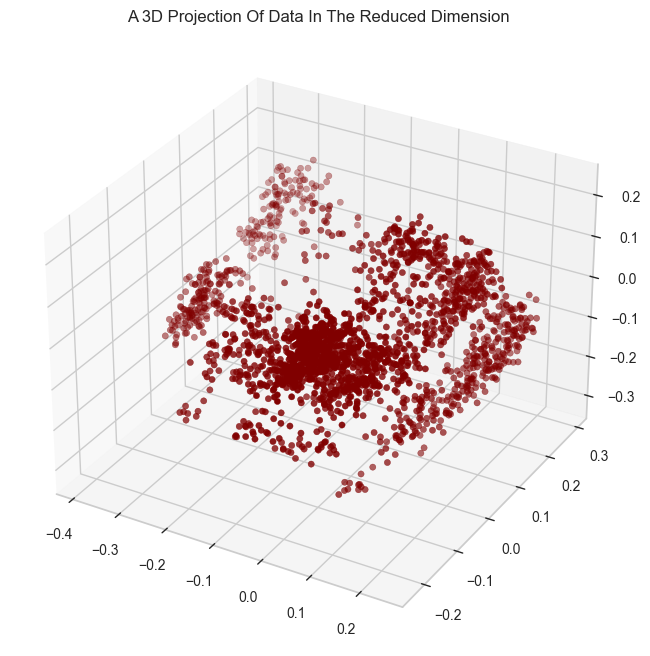

In [73]:
#Graficamos en 3d ya que elegimos 3 componentes
x =PCA_DF["col0"]
y =PCA_DF["col1"]
z =PCA_DF["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

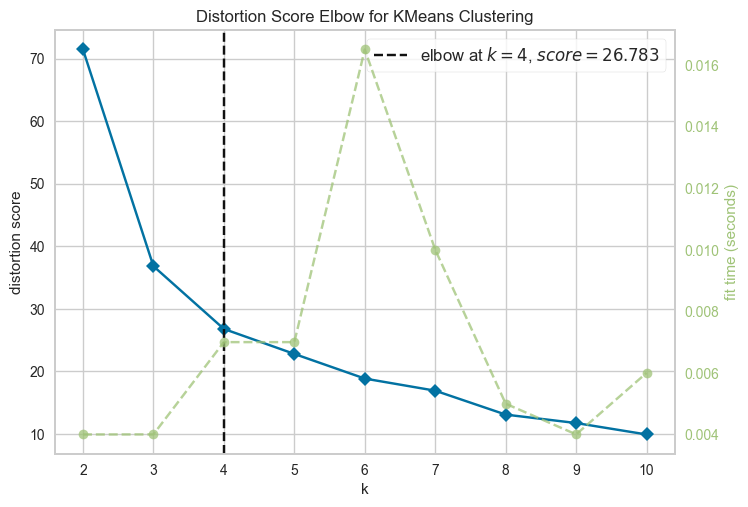

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# Realizo la grafica del codo para saber cuantos cluster son necesarios, para PC = 3
bow = KElbowVisualizer(KMeans(),k=10)
bow.fit(PCA_DF)
bow.show()

## Entrenamos el Modelo

In [75]:
# inicializamos una instacia del Kmeans
cluster_Km1= KMeans(n_clusters=5, random_state= 13)
cluster_Km1.fit(PCA_DF)
klabels1 = cluster_Km1.labels_
df1['cluster'] = klabels1
df1['cluster'] = df1['cluster'].astype(str)
silhouette_avg = silhouette_score(PCA_DF, klabels1)
print("Score(silouette_avg)PC3:",silhouette_avg)
df1['cluster'].value_counts()

Score(silouette_avg)PC3: 0.4455339957628374


cluster
1    910
3    416
0    329
2    201
4    144
Name: count, dtype: int64

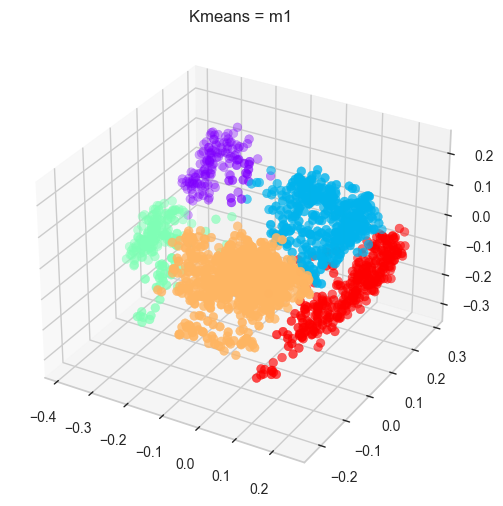

In [76]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=klabels1, marker='o', cmap = 'rainbow_r' )
ax.set_title("Kmeans = m1")
plt.show()

# Proceso Matrix 2

## Reducimos dimensionalidad

In [77]:
pca = PCA(n_components=10)
sklearn_transf = pca.fit_transform(m2)
varianza_expl = pca.explained_variance_ratio_
varianza_expl

array([0.23028658, 0.16867208, 0.08147695, 0.06327177, 0.05583672,
       0.04231727, 0.03197797, 0.02575751, 0.02489848, 0.02157897])

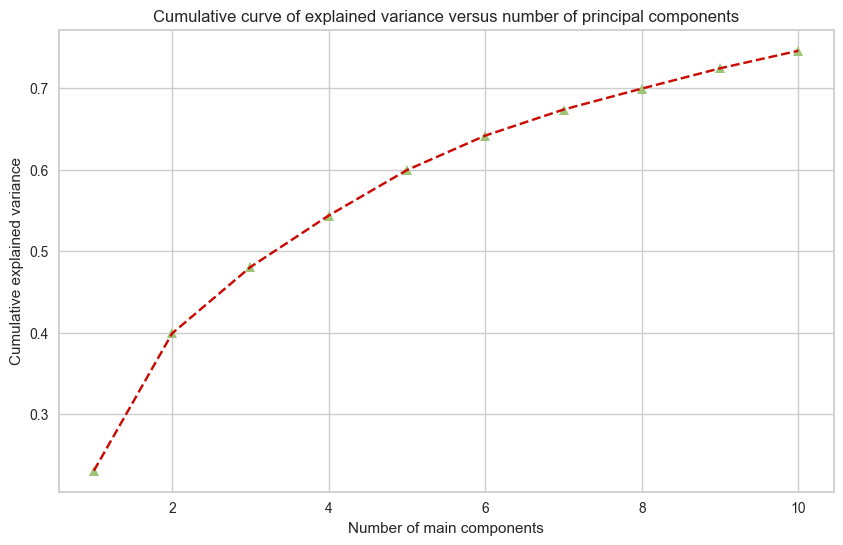

In [78]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

In [79]:
pca = PCA(n_components = 3)
pca.fit(m1)
PCA_DF=pd.DataFrame(pca.transform(m2), columns=['col0','col1', 'col2'])
PCA_DF.describe()

,col0,col1,col2
count,2000.000000,2000.000000,2000.000000
mean,-0.021242,-0.040486,-0.007474
std,0.161429,0.136145,0.088431
min,-0.396299,-0.230446,-0.229005
25%,-0.082596,-0.159106,-0.069318
50%,0.017143,-0.056139,-0.002157
75%,0.091072,0.072387,0.046927
max,0.205820,0.270776,0.196118


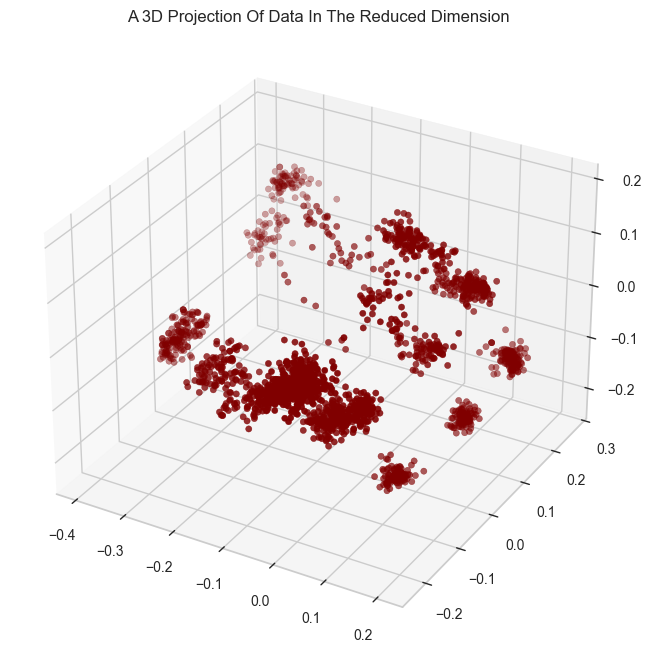

In [80]:
#Graficamos en 3d ya que elegimos 3 componentes
x =PCA_DF["col0"]
y =PCA_DF["col1"]
z =PCA_DF["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

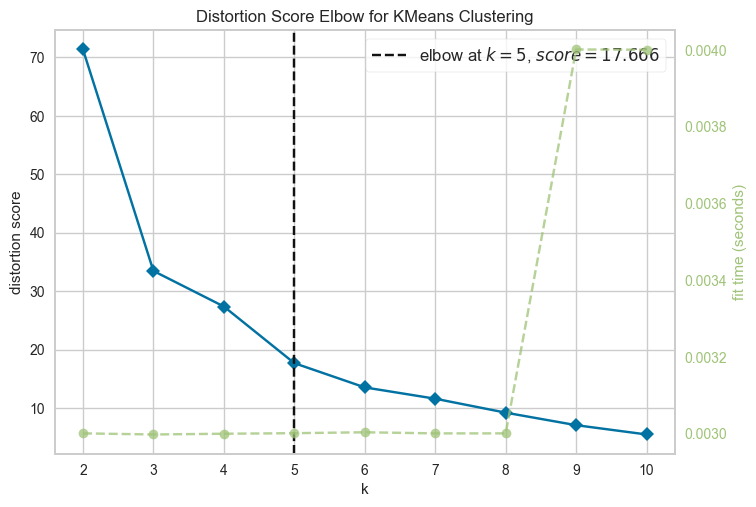

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
# Realizo la grafica del codo para saber cuantos cluster son necesarios, para PC = 3
bow = KElbowVisualizer(KMeans(),k=10)
bow.fit(PCA_DF)
bow.show()

In [82]:
# inicializamos una instacia del Kmeans
cluster_Km2= KMeans(n_clusters=4, random_state=13)
cluster_Km2.fit(PCA_DF)
klabels2 = cluster_Km2.labels_
df2['cluster'] = klabels2
df2['cluster'] = df2['cluster'].astype(str)
silhouette_avg = silhouette_score(PCA_DF, klabels2)
print("Score(silouette_avg)PC3:",silhouette_avg)
df2['cluster'].value_counts()

Score(silouette_avg)PC3: 0.5437462235832802


cluster
1    957
3    429
0    318
2    296
Name: count, dtype: int64

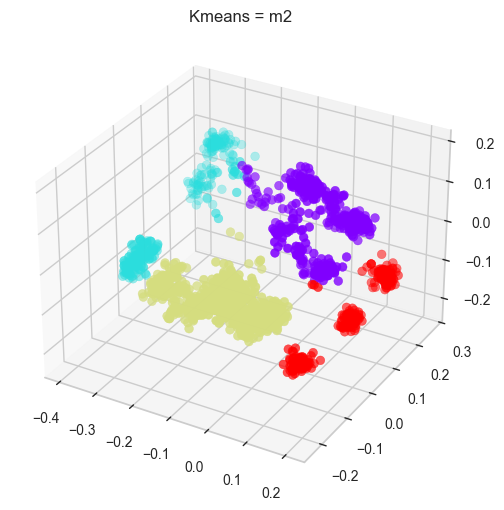

In [83]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
scatter = ax.scatter(x, y, z, s=40, c=klabels2, marker='o', cmap = 'rainbow_r' )
ax.set_title("Kmeans = m2")


plt.show()

# Ultilizaremos el GPT 3.5 Turbo para que nos de el nombre que le daria a cada cluster y el por que.

### seleccionaremos datos por cluster  para que nos realice la definicion


Para la Matrix 1

In [84]:
df1['mix']=df1['mix']+ "; Cluster:" + df1['cluster']
df2['mix']=df2['mix']+ "; Cluster:" + df2['cluster']

In [ ]:
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", ""))
LLM = "gpt-3.5-turbo"
LLM = "gpt-3.5-turbo"

In [86]:
num_cluster = 10


for i in ["0" ,"1" ,"2", "3" ,"4"]:
    
    clientes = "\n".join(df1[df1['cluster'] == i].mix.sample(num_cluster, random_state=13).values)
    
    response = client.chat.completions.create(
        model=LLM,
        
        messages=[
            {"role": "user",
             "content": f'''he agrupado por cluster los siguientes clientes, segun la informacion, necesito dar un nombre cada cluster y 
              y una corta explicacion de la relacion entre las variables, la variable Cluster es la que contiene el grupo del cliente \n\nDatos Clientes:\n"""\n{clientes}'''}
     
        ],
        temperature=1,
        max_tokens=100,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response.choices[0].message.content)
    print("\n")



Cluster 0: High-End Retailers

Este cluster está compuesto por clientes con una reputación de green_platinum que ofrecen una variedad de productos de alta calidad en diversas categorías. Tienen una gran cantidad de stock disponible y ofrecen tanto precios regulares como descuentos. Utilizan diferentes tipos de logística para satisfacer las necesidades de sus clientes. Los productos ofrecidos son nuevos y no están reacondicionados.


Cluster 1: Cluster de productos variados
Explicación: Este cluster incluye una variedad de productos en diferentes categorías, con diferentes precios, niveles de stock y condiciones del producto. La mayoría de los productos tienen una reputación verde, no son reacondicionados y se envían a través de Cross Docking.


Cluster 1: Clientes con reputación "red", que venden productos de electrónica con stock limitado y a precios altos, principalmente en la categoría de SMARTPHONES & TABLETS. No ofrecen productos reacondicionados y utilizan Cross Docking como méto

Para la Matrix 2

In [87]:
num_cluster = 10

for i in ["0" ,"1" ,"2", "3"]:
    print("Cluster",i) 
    clientes = "\n".join(df2[df2['cluster'] == i].mix.sample(num_cluster, random_state=13).values)
    
    response = client.chat.completions.create(
        model=LLM,
        
        messages=[
            {"role": "user",
             "content": f'''he agrupado por cluster los siguientes clientes, segun la informacion, necesito dar solo un nombre cada cluster, deben ser diferentes y 
              y una corta explicacion de la relacion entre las variables, la variable Cluster es la que contiene el grupo del cliente \n\nDatos Clientes:\n"""\n{clientes}'''}
     
        ],
        temperature=0,
        max_tokens=100,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response.choices[0].message.content.replace("\n", ""))
    print("\n")



Cluster 0
Cluster 0: "Premium Sellers"Explicación: Este cluster agrupa a clientes con reputación green_platinum que ofrecen productos de alta calidad a precios premium. Utilizan diferentes tipos de logística, pero en su mayoría no ofrecen productos refurbished y tienen una variedad de categorías en su stock. Además, suelen ofrecer precios regulares y tienen un stock variado.


Cluster 1
Cluster 1: "Premium Products"Explicación: Este cluster agrupa a clientes que ofrecen productos de alta calidad y precio premium, con una reputación positiva y un stock variado. Utilizan principalmente el Cross Docking como método logístico y ofrecen productos nuevos o ligeramente usados. Además, tienen una variedad de categorías de productos y algunos ofrecen precios regulares y otros no.


Cluster 2
Cluster 1: "Low Inventory High Price"Explicación: Este cluster agrupa a clientes con baja cantidad de productos en stock y precios altos en sus productos.Cluster 2: "Diverse Inventory"Explicación: Este clus

In [88]:
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'seller_nickname', 'products', 'stock', 'price',
       'seller_reputation', 'Lt', 'condition', 'isrefu', 'category_id',
       'regular_price1', 'pxp', 'mix', 'tokens', 'embedding', 'cluster'],
      dtype='object')
Index(['Unnamed: 0', 'seller_nickname', 'products', 'stock', 'price',
       'seller_reputation', 'Lt', 'condition', 'isrefu', 'category_id',
       'regular_price1', 'pxp', 'mix', 'tokens', 'totalcat', 'embedding',
       'cluster'],
      dtype='object')


In [89]:
# Exportamos los dataframe con los labels para entrenar un classificador

df1.to_csv("D:\Clustering_MeLi\src\data\processed\data_cluster_m1.csv", sep= '|')
df2.to_csv("D:\Clustering_MeLi\src\data\processed\data_cluster_m2.csv", sep= '|')